<a href="https://colab.research.google.com/github/YMGYM/google_colab_files/blob/master/Image_Text_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch 를 활용하여 모델을 import 합니다.

In [ ]:
import torch
import torchvision.models as models # 임베딩 모델
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset

In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image

In [ ]:
!unzip -q /content/drive/MyDrive/Datasets/flickr8k.zip -d data

In [ ]:
imageModel = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

데이터 제너레이터를 생성합니다.

In [ ]:
class CaptionDataset(Dataset):
  
    def __init__(self,root_dir,captions_file,transform=None,freq_threshold=5):
        self.root_dir = root_dir
        self.df = pd.read_csv(captions_file)
        self.transform = transform
        
        #Get image and caption colum from the dataframe
        self.imgs = self.df["image"]
        self.captions = self.df["caption"]
        
        #Initialize vocabulary and build vocab -- 사용하지 않음
        # self.vocab = Vocabulary(freq_threshold)
        # self.vocab.build_vocab(self.captions.tolist())
        
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,idx):
        caption = self.captions[idx]
        img_name = self.imgs[idx]
        img_location = os.path.join(self.root_dir,img_name)
        img = Image.open(img_location).convert("RGB")
        
        #apply the transfromation to the image
        if self.transform is not None:
            img = self.transform(img)
        
        #numericalize the caption text
        # caption_vec = []
        # caption_vec += [self.vocab.stoi["<SOS>"]]
        # caption_vec += self.vocab.numericalize(caption)
        # caption_vec += [self.vocab.stoi["<EOS>"]]

        
        
        # return img, torch.tensor(caption_vec)

        return img, caption

In [ ]:
train_data = CaptionDataset('/content/data/Images', '/content/data/captions.txt', transform=transform)

In [ ]:
img, cap = train_data[0]

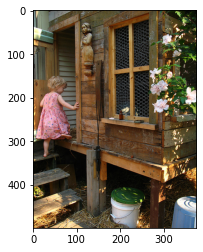

In [ ]:
import matplotlib.pyplot as plt

# img2 = img.reshape((500, 375, 3))
# img2.shape
plt.imshow(img)
plt.show()

In [ ]:
cap

'A child in a pink dress is climbing up a set of stairs in an entry way .'

# 할 일

- 캡션 토큰화
- 이미지를 RESNET에 입력

In [ ]:
img = img.reshape(1,3, 500, 375)

NameError: ignored

In [ ]:
imageModel(img)

RuntimeError: ignored

# 카페 리뷰 태그 불러오기

In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image

In [ ]:
review = pd.read_csv('/content/drive/MyDrive/Datasets/cafe_review_tag.csv', encoding='cp949')

In [ ]:
review.drop([197,754,4470], inplace=True)
review.dropna(inplace=True)
review = review.reset_index(drop = True)

In [ ]:
review['imgname_123'][4400]

'오거트_2.jpg'

# kor2vec 설치

In [ ]:
rev = pd.Series("<sos> " + review['review'])
rev.to_csv("review_corpus.csv")

In [ ]:
!pip install git+https://github.com/naver/kor2vec.git

  Cloning https://github.com/naver/kor2vec.git to /tmp/pip-req-build-guxad8pi
  Running command git clone -q https://github.com/naver/kor2vec.git /tmp/pip-req-build-guxad8pi
  Created wheel for kor2vec: filename=kor2vec-1.0.1-cp37-none-any.whl size=21946 sha256=16ff3517ec79acbab3cca264feacfa7a576658ef800e38dfcb9851697a01cb39
  Stored in directory: /tmp/pip-ephem-wheel-cache-9cjtaosf/wheels/b7/74/03/492f7af08e1f00c56765b0f6a25f28a086cc23db1827f269a4
Successfully built kor2vec


In [ ]:
from kor2vec import Kor2Vec

kor2vec = Kor2Vec(embed_size=1000)

kor2vec.train("review_corpus.csv", 'model.kor2vec', batch_size=128) # takes some time

kor2vec.save("embedding") # saving embedding

Corpus Sampling:  23%|██▎       | 4623/20004 [00:00<00:00, 46229.93it/s]

Reading Corpus lines


Corpus Sampling: 100%|██████████| 20004/20004 [00:00<00:00, 38640.71it/s]


Training kor2vec
Loading Word_sample corpus
Loading corpus finished
CUDA Available/count: True 1
training on  cuda:0


EP 1:   1%|          | 5/970 [00:00<00:22, 43.44it/s]

{'epoch': 0, 'train_ep_loss': 3.782082332655327}


EP 2:   1%|          | 5/970 [00:00<00:21, 44.04it/s]

{'epoch': 1, 'train_ep_loss': 1.455393390065616}


EP 3:   1%|          | 5/970 [00:00<00:22, 42.72it/s]

{'epoch': 2, 'train_ep_loss': 1.3587160181753415}


EP 4:   1%|          | 5/970 [00:00<00:22, 42.93it/s]

{'epoch': 3, 'train_ep_loss': 1.2729626712110853}


EP 5:   1%|          | 5/970 [00:00<00:22, 43.33it/s]

{'epoch': 4, 'train_ep_loss': 1.1721117994219987}


EP 6:   1%|          | 5/970 [00:00<00:22, 42.23it/s]

{'epoch': 5, 'train_ep_loss': 1.0839420424294226}


EP 7:   1%|          | 5/970 [00:00<00:22, 43.03it/s]

{'epoch': 6, 'train_ep_loss': 1.0018595008659608}


EP 8:   1%|          | 5/970 [00:00<00:22, 43.67it/s]

{'epoch': 7, 'train_ep_loss': 0.9321927677417539}


EP 9:   1%|          | 5/970 [00:00<00:22, 42.15it/s]

{'epoch': 8, 'train_ep_loss': 0.8727936435759682}


EP 9: 100%|██████████| 970/970 [00:23<00:00, 42.13it/s]

{'epoch': 9, 'train_ep_loss': 0.8177528740050867}


In [ ]:
from kor2vec import Kor2Vec
kor2vec = Kor2Vec.load("embedding")

kor2vec.embedding("<sos> 안녕 아이오아이야 나는 클로바에서 왔어")

tensor([[-0.4290,  0.2893,  0.1450,  ..., -0.2780, -0.3546,  0.4484],
        [ 0.5601,  0.0890, -0.0867,  ...,  0.0016, -0.0298,  0.3092],
        [-0.0358,  0.3580,  0.4955,  ...,  0.1395, -0.1390,  0.2334],
        [-0.0367, -0.0194, -0.0867,  ..., -0.0705, -0.0142, -0.1954],
        [ 0.0644,  0.0089,  0.1025,  ..., -0.4057, -0.0329,  0.2588],
        [-0.0367,  0.1971, -0.0867,  ..., -0.1056,  0.3460,  0.2185]],
       grad_fn=<CatBackward>)

In [ ]:
# 글자수 만큼 임베딩됨
emb = kor2vec.embedding("안녕 안녕 나는 지수야. 헬륨가스 먹었더니 요렇게 됐지")
emb.shape

torch.Size([8, 1000])

In [ ]:
# seq_len을 설정 가능
print(review['review'][0])
emb1 = kor2vec.embedding(review['review'][0])
print(f"Original shape : {emb1.shape}")

emb2 = kor2vec.embedding(review['review'][0], seq_len=10)
print(f"Cut shape : {emb2.shape}")

뚝섬역 골목에 위치한 브런치 맛집인 앤드밀 생각보다 양이 많아서 엄청 배불렀고 바질크림이 너무 맛있었던곳!
Original shape : torch.Size([14, 128])
Cut shape : torch.Size([10, 128])


# 카페 이미지 불러오기

In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import torch
import torchvision.models as models # 임베딩 모델
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset

In [ ]:
!unzip -q /content/drive/MyDrive/Datasets/img_preprocess_final_20210615.zip -d data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
카페 모멘트_1.jpg:  mismatching "local" filename (ь╣┤эОШ ыкиыйШэК╕_1.jpg),
         continuing with "central" filename version
카페 모멘트_2.jpg:  mismatching "local" filename (ь╣┤эОШ ыкиыйШэК╕_2.jpg),
         continuing with "central" filename version
카페 모멘트_3.jpg:  mismatching "local" filename (ь╣┤эОШ ыкиыйШэК╕_3.jpg),
         continuing with "central" filename version
카페 모임_1.jpg:  mismatching "local" filename (ь╣┤эОШ ыкиьЮД_1.jpg),
         continuing with "central" filename version
카페 모임_2.jpg:  mismatching "local" filename (ь╣┤эОШ ыкиьЮД_2.jpg),
         continuing with "central" filename version
카페 모임_3.jpg:  mismatching "local" filename (ь╣┤эОШ ыкиьЮД_3.jpg),
         continuing with "central" filename version
카페 몬드 마카롱_1.jpg:  mismatching "local" filename (ь╣┤эОШ ыкмыУЬ ызИь╣┤ыб▒_1.jpg),
         continuing with "central" filename version
카페 몬드 마카롱_2.jpg:  mismatching "local" filename (ь╣┤эОШ ыкмыУЬ ызИь╣┤ыб▒_2.jpg),
         continuing with "centra

In [ ]:
# 우리 데이터에 맞게 Dataset 설정
class CaptionDataset(Dataset):
  
    def __init__(self, img_dir, caption_df, transform=None,freq_threshold=5):
        self.root_dir = img_dir
        self.transform = transform
        self.df = caption_df
        
        #Get image and caption colum from the dataframe
        self.imgs = self.df['imgname_123']
        self.captions = self.df["review"]
        self.kor2vec = Kor2Vec.load("embedding")
        
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,idx):
        caption = self.captions[idx]
        
        img_name = self.imgs[idx]
        img_location = os.path.join(self.root_dir,img_name)
        img = Image.open(img_location).convert("RGB")
        
        # #apply the transfromation to the image
        if self.transform is not None:
          img = self.transform(img)
          img = img.unsqueeze(0)

        caption = self.kor2vec.embedding(caption, seq_len=15)

        return img, caption

In [ ]:
img_data = CaptionDataset('/content/data', review, transform=None)

In [ ]:
img, rev = img_data[5050]

tensor([[-0.0367, -0.0194,  0.1312,  ..., -0.0680, -0.0644,  0.1177],
        [ 0.0245, -0.2961, -0.0161,  ..., -0.0319,  0.6127, -0.2344],
        [-0.0367, -0.0194, -0.0867,  ..., -0.0200, -0.1647, -0.2109],
        ...,
        [-0.0367, -0.0194, -0.0867,  ..., -0.0580, -0.0508,  0.0025],
        [-0.0367, -0.0194, -0.0867,  ..., -0.0580, -0.0508,  0.0025],
        [-0.0367, -0.0194, -0.0867,  ..., -0.0580, -0.0508,  0.0025]],
       grad_fn=<CatBackward>)


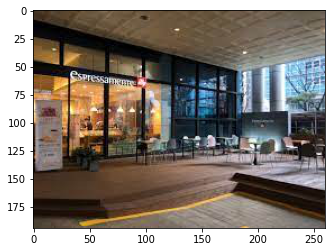

In [ ]:
import matplotlib.pyplot as plt

print(rev)
plt.imshow(img)
plt.show()

In [ ]:
resNet = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize(224),
     transforms.CenterCrop(224),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
train_data = CaptionDataset('/content/data', review, transform=transform)

In [ ]:
img, rev = train_data[0]

In [ ]:
img.shape

torch.Size([3, 3, 224, 224])

In [ ]:
rev.shape

torch.Size([14, 1000])

In [ ]:
result = resNet(img)
result.shape

torch.Size([3, 1000])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
lstm = nn.LSTM(input_size = 64, hidden_size=1000, batch_first=False)

In [ ]:
out, (h ,c)  = lstm(result.reshape(1,-1,1000))

RuntimeError: ignored

In [ ]:
out.shape

torch.Size([1, 1, 128])

In [ ]:
h.shape

torch.Size([14, 1, 128])

In [ ]:
hidden = (result.reshape(1,-1,1000),result.reshape(1,-1,1000))
outputs = torch.zeros(14, 3, 1000)

In [ ]:
input = torch.ones(1,3, 128)
for t in range(1, 14):
            output, hidden = lstm(output, hidden)
            outputs[t] = output

RuntimeError: ignored

In [ ]:
outputs.shape

torch.Size([14, 3, 1000])

In [ ]:
rev.shape

torch.Size([14, 1000])

In [ ]:
rev2 = torch.zeros(3, 14, 1000)
for i in range(3):
  rev2[i] = rev

In [ ]:
rev2.shape

torch.Size([3, 14, 1000])

In [ ]:
loss = nn.MSELoss()
output = loss(rev2, outputs.reshape(3, 14, 1000))

In [ ]:
output

tensor(0.1400, grad_fn=<MseLossBackward>)

# 모델의 클래스화

In [ ]:
kor2vec.embedding('<sos>').shape

torch.Size([1, 1000])

In [218]:
import torch
import torch.nn as nn
import torch.optim as optim
from kor2vec import Kor2Vec



class Net(nn.Module):
  def __init__(self, hidden_size = 1000):
    super(Net, self).__init__()

    self.hidden_size = hidden_size
    # self.kor2vec = Kor2Vec.load("embedding")
    self.resnet = models.resnet18(pretrained=True)
    self.lstm = nn.LSTM(input_size = self.hidden_size, hidden_size=self.hidden_size, batch_first=False)


    # # 파라미터를 잠그고 마지막 레이어만 얼리지 않음
    for param in self.resnet.parameters():
       param.requires_grad = False
    self.resnet.fc.requires_grad = True

  def forward(self, x):

    x = self.resnet(x) # resnet 통과 (batch, hidden)

    hidden = (x.reshape(1,-1,self.hidden_size),x.reshape(1,-1,self.hidden_size)) # lstm의 초기값으로 입력됨
    outputs = torch.zeros(15, 1, self.hidden_size).to(device) # 저장용 빈 배열
    

    output = kor2vec.embedding('<sos>').reshape(1, 1, self.hidden_size).to(device) # default vector (like <sos>)

    # hidden to seq 통과.
    for t in range(0, 15):
        output, hidden = self.lstm(output, hidden) 
        outputs[t] = output

    return outputs

In [235]:
model = Net()

In [194]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize(224),
     transforms.CenterCrop(224),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = CaptionDataset('/content/data', review, transform=transform)

In [236]:
# loss func과 optimizer 정의
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [237]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [238]:
model.to(device)

Net(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [185]:
train_data = CaptionDataset('/content/data', review, transform=transform)

In [ ]:
# 신경망 학습(?)

for epoch in range(10):
  running_loss = 0.0

  for i, data in enumerate(train_data, 0):
    img, label = data[0].to(device), data[1].to(device)
    optimizer.zero_grad()

    output = model(img)

    loss = criterion(output.squeeze(1), label.to(device))
    loss.backward()
    optimizer.step()

    running_loss = loss.item()
    print('[%d, %5d] loss: %.3f' %
                  (epoch +1, i+1, running_loss))
    
    if i>= 8235: break
    
    # if i % 100 == 0: # 매 100번 미니배치마다 출력하기
    #         print('[%d, %5d] loss: %.3f' %
    #               (epoch +1, i+1, running_loss / 2000))
    #         running_loss =0.0


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[2,   762] loss: 0.150
[2,   763] loss: 0.150
[2,   764] loss: 0.087
[2,   765] loss: 0.087
[2,   766] loss: 0.087
[2,   767] loss: 0.068
[2,   768] loss: 0.068
[2,   769] loss: 0.068
[2,   770] loss: 0.134
[2,   771] loss: 0.134
[2,   772] loss: 0.134
[2,   773] loss: 0.090
[2,   774] loss: 0.090
[2,   775] loss: 0.090
[2,   776] loss: 0.098
[2,   777] loss: 0.098
[2,   778] loss: 0.098
[2,   779] loss: 0.082
[2,   780] loss: 0.082
[2,   781] loss: 0.082
[2,   782] loss: 0.051
[2,   783] loss: 0.051
[2,   784] loss: 0.051
[2,   785] loss: 0.116
[2,   786] loss: 0.116
[2,   787] loss: 0.116
[2,   788] loss: 0.102
[2,   789] loss: 0.102
[2,   790] loss: 0.102
[2,   791] loss: 0.130
[2,   792] loss: 0.130
[2,   793] loss: 0.130
[2,   794] loss: 0.070
[2,   795] loss: 0.070
[2,   796] loss: 0.070
[2,   797] loss: 0.095
[2,   798] loss: 0.095
[2,   799] loss: 0.095
[2,   800] loss: 0.070
[2,   801] loss: 0.070
[2,   802] loss: 0.069
[2,   803] loss: 0.15

In [126]:
review = pd.read_csv('/content/drive/MyDrive/Datasets/cafe_review_tag.csv', encoding='cp949')

In [128]:
review.drop([197,754,4470, 4641, 5248], inplace=True)
review.dropna(inplace=True)
review = review.reset_index(drop = True)

In [127]:
review[review['imgname_123'] == '쥬씨&차얌 양재점_3.jpg']

,cafename_noblank,imgname_123,imgname,review,review_cafename,review_user,review_sympathy,tag_cafename,locate,taste_score,price_score,service_score,feat_text,purpose_list,main_tag_list,score_list,star_score,like,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,purpose_11,purpose_12,purpose_13,purpose_14,purpose_15,purpose_16,purpose_17,purpose_18,purpose_19,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat10
5248,쥬씨&차얌양재점,쥬씨&차얌 양재점_3.jpg,쥬씨&차얌 양재점,내부화장실x\r\n와이파이x\r\n내부에 앉을만한 공간 없고 테이크아웃만 가능한 곳...,쥬씨&차얌 양재점,"sosohanreview (76곳 작성, 93개 공감받음)\r\n2020년 9월 5일",93.0,쥬씨&차얌 양재점,서울 서초구 양재동 11-86,-,-,-,[],['-'],-,-,4.0점,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,저렴한,저렴한


In [234]:
review['imgname_123'][116]

'bake a day_1.jpg'

In [186]:
img, rev = train_data[0]

In [187]:
rev.shape

torch.Size([15, 1000])

In [228]:
model(img.to(device)).squeeze(1).shape

torch.Size([15, 1000])

In [192]:
kor2vec.embedding('<sos>').shape

torch.Size([1, 1000])